
# Project: Investigate a Dataset - European Soccer Data base as case study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

The Data set i have chosen to investigate is European Soccer Data base.
Following are few features included in the dataset.
* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The file I recieved was in sqllite.db format. I have decided to analyze 'England Premier League' out of different leagues. 
* Question 1: To find number of home goals scored by each team in the league for each season?
* Question 2: To find number of away goals scored by each team in the league for each season?
* Question 3: Total number of goals scored in each season?
* Question 4:What is the average number of goals scored in each season and corresponding standard deviation?
* Question 5: Number of wins by each team in each season?
* Question 6: Which team had scored most number of goals in each season? 
* Question 7: Which team had won most number of matches in each season?
* Question 8:Does the total number of goals scored in each season correlates with maximum number of goals scored by a team in each season?
* Question 9:Whether  the number of home goals is always greater than away goals scored by the team which won most matches in each season?
* Question 10:What is the maximum number of home goals scored and in which season was it scored ?
* Question 11: What is the maximum number of away goals scored and in which season was it scored?


In [21]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
In this section we trim the SQL database information to only the fields which we are interested in analysis.
Since only 'England Premier League' is considered we have filtered the data based on the league_name.

In [22]:
'''Use this Cell to connect to the database and trim the SQL data to the data required for the analysis
   Returns a pandas data frame with required fields as column name'''

#get the database file
database = 'database.sqlite'
# get the connection to the sql database
conn = sqlite3.connect(database)
# We only need match data realted to 'England Premier League' and only match_id, 
#league_name, season, home_team_long_name, away_team_long_name, home team goals
#and away team goals
detail_matches_EPL = pd.read_sql("""SELECT Match.id, 
                                        League.name AS league_name, 
                                        season, 
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE league_name = 'England Premier League'
                                ORDER by date
                                ;""", conn)
detail_matches_EPL





,id,league_name,season,home_team,away_team,home_team_goal,away_team_goal
0,1730,England Premier League,2008/2009,Arsenal,West Bromwich Albion,1,0
1,1731,England Premier League,2008/2009,Sunderland,Liverpool,0,1
2,1732,England Premier League,2008/2009,West Ham United,Wigan Athletic,2,1
3,1734,England Premier League,2008/2009,Everton,Blackburn Rovers,2,3
4,1735,England Premier League,2008/2009,Middlesbrough,Tottenham Hotspur,2,1
5,1736,England Premier League,2008/2009,Bolton Wanderers,Stoke City,3,1
6,1737,England Premier League,2008/2009,Hull City,Fulham,2,1
7,1729,England Premier League,2008/2009,Manchester United,Newcastle United,1,1
8,1733,England Premier League,2008/2009,Aston Villa,Manchester City,4,2
9,1738,England Premier League,2008/2009,Chelsea,Portsmouth,4,0


Data cleaning is not required as  there are no null values, outliers, unnecessary values in the dataframe create above.

<a id='eda'></a>
## Exploratory Data Analysis

In [23]:
'''This cell contains helper functions'''
def get_home_goals(matches, team):
    ''' Get the home goals of a specfic team from a set of matches. '''
    home_goals = int(matches.home_team_goal[matches.home_team == team].sum())
    return home_goals

def get_away_goals(matches, team):
    ''' Get the away goals of a specfic team from a set of matches. '''
    away_goals = int(matches.away_team_goal[matches.away_team == team].sum())
    return away_goals
    


In [24]:
'''This cell contains helper functions'''
def get_home_wins(matches, team):
    ''' Get the number of home wins of a specfic team from a set of matches. '''
    home_wins = int(matches.home_team_goal[(matches.home_team == team) & (matches.home_team_goal > matches.away_team_goal)].count())
    return home_wins


def get_away_wins(matches, team):
    ''' Get the number of home wins of a specfic team from a set of matches. '''
    away_wins = int(matches.away_team_goal[(matches.away_team_api_id == team) & (matches.away_team_goal > matches.home_team_goal)].count()) 
    return away_wins   

In [25]:
'''This cell contains helper functions'''
def matches_per_season(matches, season):
    '''Returns match details for a given season.'''
    return matches.get_group(season)


def home_team_list(matches):
    '''Returns a list of home teams'''
    #Group the matches based on home_team key
    teams = matches.groupby('home_team')
    home_team = []
    for name in teams:
        home_team.append(name[0])
    return home_team

def away_team_list(matches):
    '''Returns a list of away teams'''
    #Group the matches based on home_team key
    teams = matches.groupby('away_team')
    away_team = []
    for name in teams:
        away_team.append(name[0])
    return away_team

def seasons_list(matches):
    '''Returns list of seasons'''
    #Group the matches based on season
    seasons = matches.groupby('season')
    season_list = []
    for season in seasons:
        season_list.append(season[0])
    return season_list



### Research Question 1: To find number of home goals scored by each team in the league for each season?

In [26]:
def get_home_goals_season_dataframe(matches):
    ''' Returns a data frame with index as home teams
        and columns as seasons and values as the home goals 
        scored by each team in that season
    '''
    #group matches by season
    matches_groupedby_season = matches.groupby('season')
    #get the list of home_team
    home_team = home_team_list(matches)
    #get the list of seasons
    season_list = seasons_list(matches)
    goal_list = []
    #create the dataframe with index as home_team list and columns as season list
    home_goals_df = pd.DataFrame(columns = season_list, index = home_team)
    for match in matches_groupedby_season:
        #get the match details for each season
        matches_season = matches_per_season(matches_groupedby_season, match[0])
        for j in range(len(home_team)):
            # get the home goals scored by a team in each season
            goal_list.append(get_home_goals(matches_season, home_team[j]))
        #append the list of home goals scored to the dataframe
        home_goals_df.loc[:,match[0]] = goal_list
        #reset the list for next iteration
        goal_list = []
    return home_goals_df

#testing purposes
print(get_home_goals_season_dataframe(detail_matches_EPL))

                         2008/2009  2009/2010  2010/2011  2011/2012  \
Arsenal                         31         48         33         39   
Aston Villa                     27         29         26         20   
Birmingham City                  0         19         19          0   
Blackburn Rovers                22         28         22         26   
Blackpool                        0          0         30          0   
Bolton Wanderers                21         26         34         23   
Bournemouth                      0          0          0          0   
Burnley                          0         25          0          0   
Cardiff City                     0          0          0          0   
Chelsea                         33         68         39         41   
Crystal Palace                   0          0          0          0   
Everton                         31         35         31         28   
Fulham                          28         27         30         36   
Hull C

### Research Question 2: To find number of away goals scored by each team in the league for each season?

In [27]:
def get_away_goals_season_dataframe(matches):
    ''' Returns a data frame with index as away teams
        and columns as seasons and values as the away goals 
        scored by each team in that season
    '''
    #group matches by season
    matches_groupedby_season = matches.groupby('season')
    #get the list of away_team
    away_team = away_team_list(matches)
    #get the list of seasons
    season_list = seasons_list(matches)
    goal_list = []
    #create the dataframe with index as away_team list and columns as season list
    away_goals_df = pd.DataFrame(columns = season_list, index = away_team)
    for match in matches_groupedby_season:
        #get the match details for each season
        matches_season = matches_per_season(matches_groupedby_season, match[0])
        for j in range(len(away_team)):
            # get the away goals scored by a team in each season
            goal_list.append(get_away_goals(matches_season, away_team[j]))
        #append the list of away goals scored to the dataframe
        away_goals_df.loc[:,match[0]] = goal_list
        #reset the list for next iteration
        goal_list = []
    return away_goals_df 

# testing purposes
print(get_away_goals_season_dataframe(detail_matches_EPL))


                         2008/2009  2009/2010  2010/2011  2011/2012  \
Arsenal                         37         35         39         35   
Aston Villa                     27         23         22         17   
Birmingham City                  0         19         18          0   
Blackburn Rovers                18         13         24         22   
Blackpool                        0          0         25          0   
Bolton Wanderers                20         16         18         23   
Bournemouth                      0          0          0          0   
Burnley                          0         17          0          0   
Cardiff City                     0          0          0          0   
Chelsea                         35         35         30         24   
Crystal Palace                   0          0          0          0   
Everton                         24         25         20         22   
Fulham                          11         12         19         12   
Hull C

### Research Question 3: Total number of goals scored in each season?

In [28]:
def total_goals_by_team_season(matches):
    '''Returns data frame with total number of goals for each team in different season'''
    # vector operations on home_goals and away goals dataframes
    return get_home_goals_season_dataframe(matches) + get_away_goals_season_dataframe(matches)

#testing purposes
print(total_goals_by_team_season(detail_matches_EPL))


                         2008/2009  2009/2010  2010/2011  2011/2012  \
Arsenal                         68         83         72         74   
Aston Villa                     54         52         48         37   
Birmingham City                  0         38         37          0   
Blackburn Rovers                40         41         46         48   
Blackpool                        0          0         55          0   
Bolton Wanderers                41         42         52         46   
Bournemouth                      0          0          0          0   
Burnley                          0         42          0          0   
Cardiff City                     0          0          0          0   
Chelsea                         68        103         69         65   
Crystal Palace                   0          0          0          0   
Everton                         55         60         51         50   
Fulham                          39         39         49         48   
Hull C

### Research Question 4:What is the average number of goals scored in each season and corresponding standard deviation?

Average goals per season 2008/2009    27.705882
2009/2010    30.970588
2010/2011    31.264706
2011/2012    31.352941
2012/2013    31.264706
2013/2014    30.941176
2014/2015    28.676471
2015/2016    30.176471
dtype: float64
Standard deviation of goals per season 2008/2009    25.436807
2009/2010    30.035749
2010/2011    27.331633
2011/2012    28.871808
2012/2013    28.389423
2013/2014    30.127124
2014/2015    26.410471
2015/2016    27.097287
dtype: float64


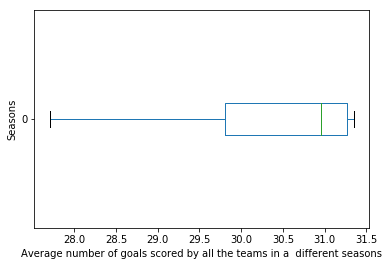

In [29]:
def average_goals_season(matches):
    '''Returns average number of goals scored by all the teams in a season'''
    return total_goals_by_team_season(matches).mean()

def standard_deviation_goals_season(matches):
    '''Returns standard deviation of goals from the mean number of goals in a season'''
    return total_goals_by_team_season(matches).std(ddof = 0)

fig = plt.figure()
# Create matplotlib axes
ax = fig.add_subplot(111) 
ax.figsize = (20,20)
#ax2 = ax.twinx()
# Set the x-axis and y-axis labels for the plots
ax.set_ylabel('Seasons')
#ax2.set_ylabel('Standard deviation of goals from the mean number of goals in each season')
ax.set_xlabel('Average number of goals scored by all the teams in a  different seasons')
#plot the bar chart for average goals per season.
average_goals_season(detail_matches_EPL).plot(ax = ax, kind = 'box', use_index = False, vert = False)


#testing purposes
print("Average goals per season {}".format(average_goals_season(detail_matches_EPL)))
print("Standard deviation of goals per season {}".format(standard_deviation_goals_season(detail_matches_EPL)))


Above plot represents box plot for Panda Series containing average number of goals scored by all teams in a season.
In the above plot the minimum value is at 27.70 and maximum value is at 31.35. Median which is represented by green line is around 31.The plot is left skewed.


### Research Question 5: Number of home and away wins by each team in each season?

In [30]:
def get_home_wins_season_dataframe(matches):
    ''' Returns a data frame with index as home teams
        and columns as seasons and values as the home wins
        by each team in that season
    '''
    #group matches by season
    matches_groupedby_season = matches.groupby('season')
    #get the list of home_team
    home_team = home_team_list(matches)
    #get the list of seasons
    season_list = seasons_list(matches)
    goal_list = []
    #create the dataframe with index as home_team list and columns as season list
    home_wins_df = pd.DataFrame(columns = season_list, index = home_team)
    for match in matches_groupedby_season:
        #get the match details for each season
        matches_season = matches_per_season(matches_groupedby_season, match[0])
        for j in range(len(home_team)):
            # get the home wins by a team in each season
            goal_list.append(get_home_wins(matches_season, home_team[j]))
        #append the list of home wins scored to the dataframe
        home_wins_df.loc[:,match[0]] = goal_list
        #reset the list for next iteration
        goal_list = []
    return home_wins_df




def get_away_wins_season_dataframe(matches):
    ''' Returns a data frame with index as away teams
        and columns as seasons and values as the away wins 
        by each team in that season
    '''
    #group matches by season
    matches_groupedby_season = matches.groupby('season')
    #get the list of away_team
    away_team = away_team_list(matches)
    #get the list of seasons
    season_list = seasons_list(matches)
    goal_list = []
    #create the dataframe with index as away_team list and columns as season list
    away_wins_df = pd.DataFrame(columns = season_list, index = away_team)
    for match in matches_groupedby_season:
        #get the match details for each season
        matches_season = matches_per_season(matches_groupedby_season, match[0])
        for j in range(len(away_team)):
            # get the  away wins by a team in each season
            goal_list.append(get_home_wins(matches_season, away_team[j]))
        #append the list of away wins to the dataframe
        away_wins_df.loc[:,match[0]] = goal_list
        #reset the list for next iteration
        goal_list = []
    return away_wins_df

#testing purposes
print(get_home_wins_season_dataframe(detail_matches_EPL))
print(get_away_wins_season_dataframe(detail_matches_EPL))


                         2008/2009  2009/2010  2010/2011  2011/2012  \
Arsenal                         11         15         11         12   
Aston Villa                      7          8          8          4   
Birmingham City                  0          8          6          0   
Blackburn Rovers                 6         10          7          6   
Blackpool                        0          0          5          0   
Bolton Wanderers                 7          6         10          4   
Bournemouth                      0          0          0          0   
Burnley                          0          7          0          0   
Cardiff City                     0          0          0          0   
Chelsea                         11         17         14         12   
Crystal Palace                   0          0          0          0   
Everton                          8         11          9         10   
Fulham                          11         11          8         10   
Hull C

### Research Question 6: Which team had scored most number of goals in each season? 

In [31]:
def max_goals_by_team_season(matches):
    ''' Returns Panda Series containing teams which scored most goals in each season'''
    total_goals_season_dataframe = total_goals_by_team_season(matches)
    return total_goals_season_dataframe.idxmax()

#testing purposes
print(max_goals_by_team_season(detail_matches_EPL))


2008/2009            Liverpool
2009/2010              Chelsea
2010/2011    Manchester United
2011/2012      Manchester City
2012/2013    Manchester United
2013/2014      Manchester City
2014/2015      Manchester City
2015/2016      Manchester City
dtype: object


### Research Question 7: Which team had won most number of matches in each season?

In [32]:
def max_wins_by_team_season(matches):
    ''' Returns Panda Series containing teams which won most gamesin each season'''
    #vector operations on home wins and away wins dataframe
    total_wins_season_dataframe = get_home_wins_season_dataframe(matches) + get_away_wins_season_dataframe(matches)
    return total_wins_season_dataframe.idxmax()

#testing purposes
print(max_wins_by_team_season(detail_matches_EPL))

2008/2009    Manchester United
2009/2010              Chelsea
2010/2011    Manchester United
2011/2012      Manchester City
2012/2013    Manchester United
2013/2014      Manchester City
2014/2015              Chelsea
2015/2016              Arsenal
dtype: object


### Research Question 8:Does the total number of goals scored in each season correlates with maximum number of goals scored by a team in each season?

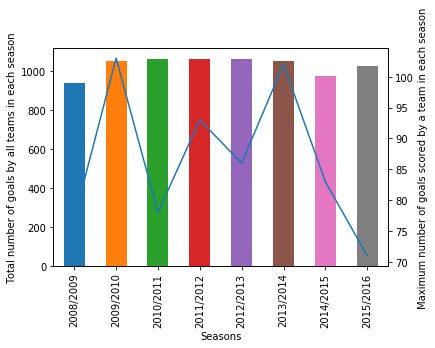

In [33]:
#Get the season list
season_list  = seasons_list(detail_matches_EPL)
fig = plt.figure()
# Create matplotlib axes
ax = fig.add_subplot(111) 
ax.figsize = (20,20)
# create second axes for line plot
ax2 = ax.twinx()
# set the x-axis and y-axis labels
ax.set_ylabel('Total number of goals by all teams in each season')
ax2.set_ylabel('Maximum number of goals scored by a team in each season')
ax.set_xlabel('Seasons')
# plot the bar graph for total number of goals by all team in each season
total_goals_df = total_goals_by_team_season(detail_matches_EPL)
total_goals_df.sum().plot(kind = 'bar', ax = ax)
#get the maximum goals scored by the team in each season in a Panda series
max_goals_by_team = max_goals_by_team_season(detail_matches_EPL)
max_goals_list = []
# iterate through each column which represents data for a season
for index, values in max_goals_by_team.iteritems():
    max_goals_list.append(total_goals_df.loc[values, index])
max_goals_season = pd.Series(max_goals_list, index = season_list)
# plot the line graph for maximum goals scored by a team in each season
max_goals_season.plot(ax = ax2)

In the above plot , bar graph represents total number of goals scored in each season and line chart represents maximum goals scored by a team in each season.
Using this plot, trying to analyze if maximum goals increases along with total number of goals for each season

### Research Question 9:Whether  the number of home goals is always greater than away goals scored by the team which won most matches in each season?

Total number of home_goals by winning team for each season
2008/2009    43
2009/2010    68
2010/2011    49
2011/2012    55
2012/2013    45
2013/2014    63
2014/2015    36
2015/2016    31
dtype: int64
Total number of away_goals by winning team for each season
2008/2009    25
2009/2010    35
2010/2011    29
2011/2012    38
2012/2013    41
2013/2014    39
2014/2015    37
2015/2016    34
dtype: int64


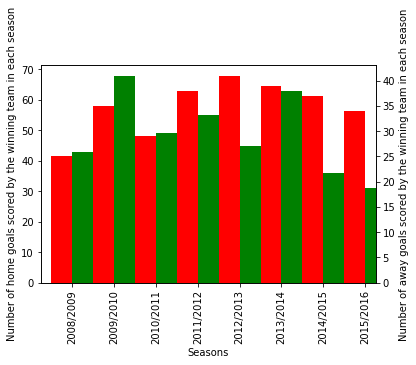

In [34]:

def home_away_goal_series(matches):
    '''Returns a tuple of Panda series representing home goals and away goals'''
    #get the dataframe for home goals per team in each season 
    home_goals_team_season = get_home_goals_season_dataframe(matches)
    #get the dataframe for away goals per team in each season 
    away_goals_team_season = get_away_goals_season_dataframe(matches)

    # get the maximum wins by the team in each season in a Panda Series
    max_wins_team = max_wins_by_team_season(matches)
    home_goals_list = []
    away_goals_list = []
    # iterate through each column which represents data for a season
    # get the number of home goals and away goals scored by the team which won
    # most number of matches in two Panda series
    for index, values in max_wins_team.iteritems():
        home_goals_list.append(home_goals_team_season.loc[values, index])
        away_goals_list.append(away_goals_team_season.loc[values, index])
    home_goals_series = pd.Series(home_goals_list, index = season_list)
    away_goals_series = pd.Series(away_goals_list, index = season_list)
    return(home_goals_series, away_goals_series)
home_goals_series, away_goals_series = home_away_goal_series(detail_matches_EPL)
fig = plt.figure()
# Create matplotlib axes
ax = fig.add_subplot(111) 
ax.figsize = (20,20)
# create second axes for plotting away goals
ax2 = ax.twinx()
#set the x-axis and y-axis labels
ax.set_ylabel('Number of home goals scored by the winning team in each season')
ax2.set_ylabel('Number of away goals scored by the winning team in each season')
ax.set_xlabel('Seasons')
#plot the bar graph for home goals
home_goals_series.plot(ax = ax, kind = 'bar', position = 0, color = 'green')
#plot the bar graph for away goals
away_goals_series.plot(ax = ax2, kind = 'bar', position = 1, color = 'red')

#testing purposes
print("Total number of home_goals by winning team for each season")
print(home_goals_series)
print("Total number of away_goals by winning team for each season")
print(away_goals_series)


Bar graph in red represents the away goals for each season and Bar graph in green represents home goals for each season. Using this plot to check whether home goals are always greater than away goals for each season , which is not true for all the seasons from above plot.

### Research Question 10:What is the maximum number of home goals scored and in which season was it scored ?


In [35]:
print("maximum number of home goals scored is {} in season {}".format(home_goals_series.max(), home_goals_series.idxmax()))


maximum number of home goals scored is 68 in season 2009/2010


### Research Question 11:What is the maximum number of away goals scored and in which season was it scored ?

In [36]:
print("maximum number of away goals scored is {} in season {}".format(away_goals_series.max(), away_goals_series.idxmax()))

maximum number of away goals scored is 41 in season 2012/2013


<a id='conclusions'></a>
## Conclusions

 From  Question 4 ,if  we consider data for one season , for example  season 2008/2009, mean of the total number of goals scored is 27.71 and standard deviation is 25.44. Which means total number of goals scored by a team in season 2008/2009 can vary between (27.71 + 25.44) and (27.71 + 25.44). Deviation is very high.


From Question 8,  we see the plot of bar chart vs line chart. Here bar chart represents total number of goals scored by all teams in each season and line chart represents maximum goals scored by a team in each season.
There is no correlation, for example if i consider for season 2009/2010,total number of goals has increased from previous season as well as maximum goals scored by a team has also increased, but for season 2010/2011 there is slight increase in total number of goals scored but the there is dip in the maximum goals scored by a team in that season.
From this we can infer that, even if total number of goals incresed in a season doesn't mean that maximum number of goals scored by a team should also increase.

From Question 9, i'm trying to check if for a particular team, more number of home goals have helped to score maximum number of goals in a season. But from the bar charts of home goals against away goals for some seasons away goals are more than the home goals, like for example season 2012/2013 . So we cannot infer that having home advantage has made a team to score more goals.

Limitations in current analysis is would be not able to find factors which influenced the the teams to win most number of matches in a season since the player data and other match features were not part of dataset used for the analysis.

## References

https://www.kaggle.com/harvinderwazir/match-outcome-prediction-in-football

https://www.kaggle.com/dimarudov/data-analysis-using-sql
